<a href="https://colab.research.google.com/github/JWoinski/PracaDyp/blob/main/Clustering_Wine_Quality_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


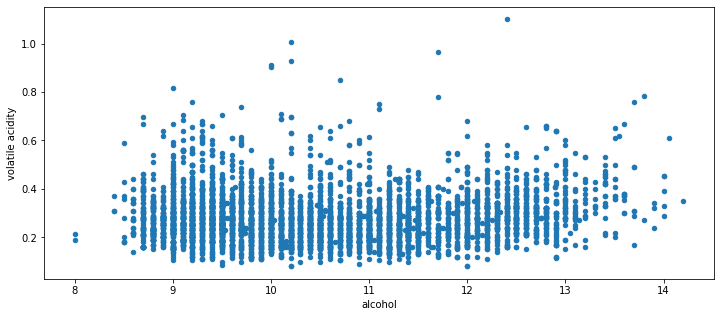

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# nazwy klas w bazie
names = ['Class','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
'density', 'pH', 'sulphates', 'alcohol','quality']
#pobieranie bazy
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(data.info())


#przedstawienie danych na wykresie
data.plot.scatter(x = 'alcohol', y = 'volatile acidity', figsize=(12,5))

      alcohol  volatile acidity
0         8.8              0.27
1         9.5              0.30
2        10.1              0.28
3         9.9              0.23
4         9.9              0.23
...       ...               ...
4893     11.2              0.21
4894      9.6              0.32
4895      9.4              0.24
4896     12.8              0.29
4897     11.8              0.21

[4898 rows x 2 columns]
     alcohol  volatile acidity
0  12.418431          0.307314
1   9.469346          0.279354
2  10.926177          0.257302


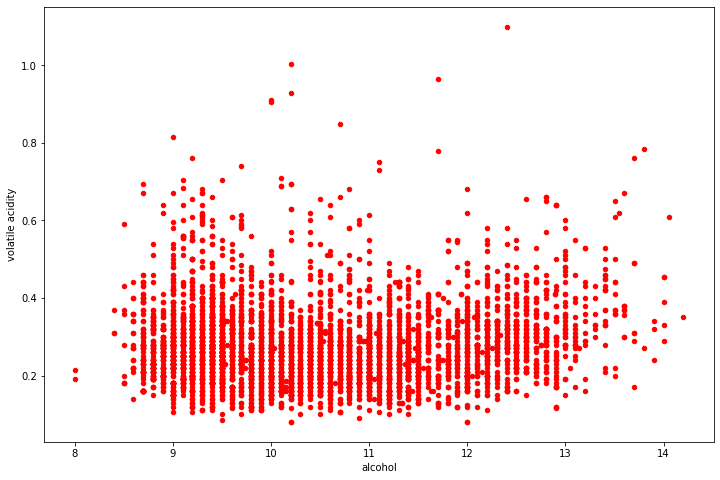

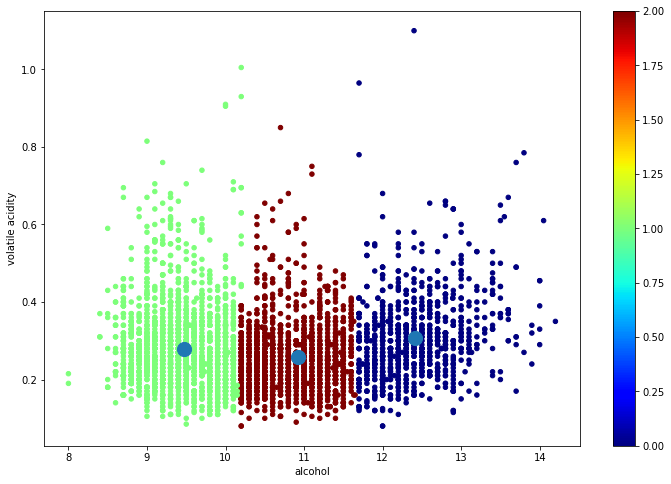

In [ ]:
#grupowanie bazy na podstawie klas "Alcohol" i "OD280"
data.plot.scatter(x = 'alcohol', y = 'volatile acidity', c= 'red', figsize=(12,8), colormap='jet')
data.iloc[:,[10,1]].head()
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state =5).fit(data.iloc[:,[10,1]])
print((data.iloc[:,[10,1]]))

centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(data.iloc[:,[10,1]].columns.values))
print(centroids_df)
fig, ax = plt.subplots(1, 1)

data.plot.scatter(x = 'alcohol', y = 'volatile acidity', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
#ustawianie centroidów dla klastrów
centroids_df.plot.scatter(x = 'alcohol', y = 'volatile acidity', ax = ax, s = 200, mark_right=False)
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 150, random_state = 5).fit(data.iloc[:,[8,6]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(data.iloc[:,[10,1]].columns.values))
